# Vérification des données de la DREES : Nationale vs Régionales

Une rumeur coure sur le net : La somme des données régionales de la DREES seraient différentes des données nationales : Je prpose ici un Notebook qui débunke cette rumeur.

Les données proviennent de :

https://data.drees.solidarites-sante.gouv.fr/explore/dataset/covid-19-resultats-regionaux-issus-des-appariements-entre-si-vic-si-dep-et-vac-s/

https://data.drees.solidarites-sante.gouv.fr/explore/dataset/covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si/

In [3]:
import pandas as pd
import numpy as np

## Choix de la statistique

In [4]:
# Choix entre nb_PCR ,nb_PCR_sympt ,nb_PCR+ ,nb_PCR+_sympt ,HC ,HC_PCR+ ,SC ,SC_PCR+
STAT_COL='HC_PCR+' # Soin critique PCR+

## Données régionales

In [5]:
region_df = pd.read_csv("region.csv", sep=";", parse_dates=["date"])

# Pivot sur le statut vaccinal
region_pivot = region_df.pivot(index=["date", "region"], columns='vac_statut', values=STAT_COL)

# Somme de toutes les regions
region_sum=region_pivot.groupby(level=0).sum()

<AxesSubplot:title={'center':'Données régionales sommées'}, xlabel='date'>

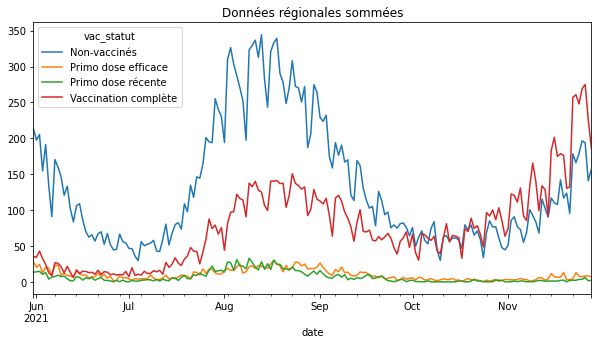

In [6]:
# Affichage des données
region_sum.plot(figsize=(10, 5), title="Données régionales sommées")

## Données nationales

In [12]:
# Changement des données nationales
nation_df = pd.read_csv("national.csv", sep=";", parse_dates=["date"])
nation_pivot = nation_df.pivot(index=["date"], columns='vac_statut', values=STAT_COL).fillna(0)

<AxesSubplot:title={'center':'Donnée nationales brutes'}, xlabel='date'>

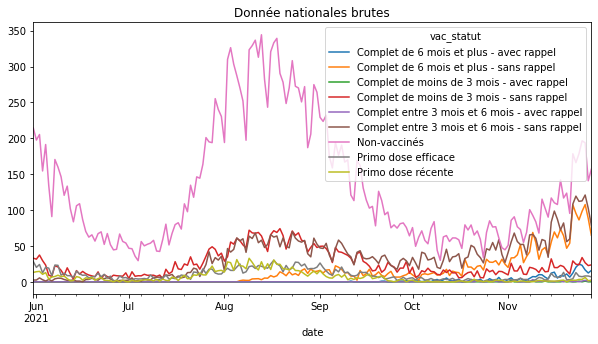

In [13]:
# Affichage des données
nation_pivot.plot(figsize=(10, 5), title="Donnée nationales brutes")

On voit que les données nationales sont plus fines : les "vaccinés complet" sont séparés en 6 sous groupes, qu'il convient de sommer.

## Somme des vaccinés

On rajoute une colonne "Complet" somme des sous groupes


In [14]:
# Liste des 6 colonnes Complet ...
cols_complet = [col for col in nation_pivot.columns if 'Complet' in col]

# On crée une colonne "Complet" somme des 6 autres
nation_pivot["Complet"] = sum(nation_pivot[col] for col in cols_complet)

## Affichage et comparaison

On retrouve bien les mêmes chiffres que la somme des données régionales

<AxesSubplot:title={'center':'chiffres nationaux'}, xlabel='date'>

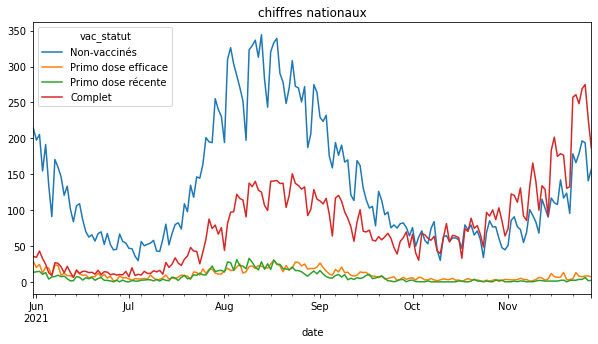

In [15]:
# Chiffres nationaux
nation_pivot.plot(y=["Non-vaccinés", "Primo dose efficace", "Primo dose récente", "Complet"], figsize=(10, 5), title="chiffres nationaux")

<AxesSubplot:title={'center':'données régionales sommées'}, xlabel='date'>

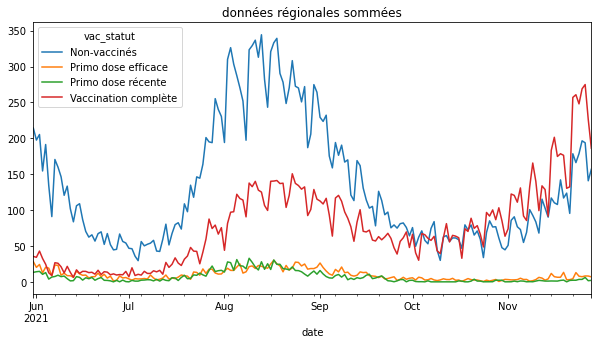

In [16]:
# Chiffres nationaux
region_sum.plot(figsize=(10, 5), title="données régionales sommées")